In [67]:
import aquire

In [68]:
aquire

<module 'aquire' from '/Users/codywatson/Desktop/ds-methodologies-exercises/classification/aquire.py'>

In [69]:
df = aquire.get_titanic_data()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [71]:
df.shape

(891, 13)

In [72]:
df.sample(10)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
195,195,1,1,female,58.0,0,0,146.5208,C,First,B,Cherbourg,1
590,590,0,3,male,35.0,0,0,7.1250,S,Third,None,Southampton,1
837,837,0,3,male,NaN,0,0,8.0500,S,Third,None,Southampton,1
456,456,0,1,male,65.0,0,0,26.5500,S,First,E,Southampton,1
498,498,0,1,female,25.0,1,2,151.5500,S,First,C,Southampton,0
797,797,1,3,female,31.0,0,0,8.6833,S,Third,None,Southampton,1
44,44,1,3,female,19.0,0,0,7.8792,Q,Third,None,Queenstown,1
719,719,0,3,male,33.0,0,0,7.7750,S,Third,None,Southampton,1
150,150,0,2,male,51.0,0,0,12.5250,S,Second,None,Southampton,1
70,70,0,2,male,32.0,0,0,10.5000,S,Second,None,Southampton,1


In [73]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [74]:
df.select_dtypes('object').head()

,sex,embarked,class,deck,embark_town
0,male,S,Third,None,Southampton
1,female,C,First,C,Cherbourg
2,female,S,Third,None,Southampton
3,female,S,First,C,Southampton
4,male,S,Third,None,Southampton


In [75]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [76]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [77]:
df.embark_town.value_counts().sum()

889

In [78]:
df.shape

(891, 13)

In [79]:
df.embark_town.value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [80]:
df.embark_town.fillna('Other').value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Other            2
Name: embark_town, dtype: int64

In [81]:
df.embark_town.fillna('Other',inplace=True)

In [82]:
df.embark_town.value_counts().sum() == df.shape

array([ True, False])

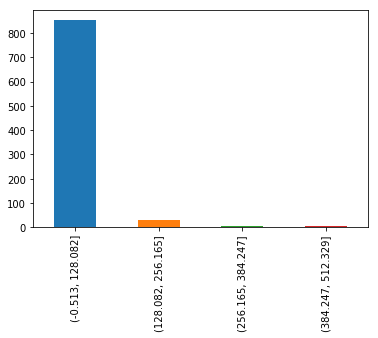

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
df.fare.value_counts(bins=4).plot.bar()
plt.show()

In [84]:
df.deck.describe()

count     203
unique      7
top         C
freq       59
Name: deck, dtype: object

In [85]:
df.deck.value_counts().sum()

203

In [86]:
df.deck.isna().sum()

688

In [87]:
df.drop(columns='deck', inplace=True)

In [88]:
df.embarked.value_counts().sum()

889

In [89]:
df.embarked.shape

(891,)

In [90]:
df.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [91]:
df.embarked.fillna('O',inplace=True)

In [92]:
df.embarked.value_counts()

S    644
C    168
Q     77
O      2
Name: embarked, dtype: int64

In [93]:
df.embarked.unique()

array(['S', 'C', 'Q', 'O'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
encoder = LabelEncoder()
encoder.fit(df.embarked)

LabelEncoder()

In [96]:
df.embarked = encoder.transform(df.embarked)

In [97]:
df.embarked

0      3
1      0
2      3
3      3
4      3
5      2
6      3
7      3
8      3
9      0
10     3
11     3
12     3
13     3
14     3
15     3
16     2
17     3
18     3
19     0
20     3
21     3
22     2
23     3
24     3
25     3
26     0
27     3
28     2
29     3
      ..
861    3
862    3
863    3
864    3
865    3
866    0
867    3
868    3
869    3
870    3
871    3
872    3
873    3
874    0
875    0
876    3
877    3
878    3
879    0
880    3
881    3
882    3
883    3
884    3
885    2
886    3
887    3
888    3
889    0
890    2
Name: embarked, Length: 891, dtype: int64

In [98]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.343434,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.167398,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.000000,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [99]:
# df.age = (df.age - df.age.min())/(df.age.max()-df.age.min())

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
train, test = train_test_split(df)

In [102]:
#fing the parameteres for scaling from the training data set, then apply to the data set

fare_min = train.fare.min()
fare_max = train.fare.max()

#scale the training data
train.fare = (train.fare - fare_min)/(fare_max - fare_min)

#scale the test data
test.fare = (test.fare -fare_min)/(fare_max -fare_min)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['fare','age']])

train[['fare','age']] = scaler.transform(train[['fare','age']])
test[['fare','age']] = scaler.transform(test[['fare','age']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [115]:
def handle_missing_values(df):
#     df.embark_town.fillna('Other',inplace=True)
#     df.embarked.fillna('O',inplace=True)
#     return df
    return df.assign(
        embark_town = df.embark_town.fillna('Other'),
        embarked = df.embarked.fillna('O')
    )

def drop_columns(df):
#     df.drop(columns='deck', inplace=True)
#     return df
    return df.drop(columns='deck')

def encode_embarked(df):
    encoder = LabelEncoder()
    encoder.fit(df.embarked)
#     df.embarked = encoder.transform(df.embarked)
#     return df
    return df.assign(embarked=encoder.transform(df.embarked))




def prep_titanic_data(df):
#     df = handle_missing_values(df)
#     df = drop_columns(df)
#     df = encode_embarked(df)
#     return df
#     return encode_embarked(drop_columns(handle_missing_values(df)))
    return df.pipe(handle_missing_values)\
        .pipe(drop_columns)\
        .pipe(encode_embarked)

# def (df):
#     train, test = train_test_split(df)

# def (df):
#     scaler = MinMaxScaler()
#     scaler.fit(train[['fare','age']])

# def (df):
#     train[['fare','age']] = scaler.transform(train[['fare','age']])
#     test[['fare','age']] = scaler.transform(test[['fare','age']])

In [119]:
from aquire import get_titanic_data

prep_titanic_data(get_titanic_data()).head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,3,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,0,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,3,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,3,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,3,Third,Southampton,1
